<a href="https://colab.research.google.com/github/ajk7196/Cricket_score_board/blob/main/CP_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path = '/content/drive/MyDrive/data science/Hotel Bookings.csv'
df = pd.read_csv(working_dir_path)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_type = df['hotel'].value_counts().index
hotel_type

Index(['City Hotel', 'Resort Hotel'], dtype='object')

In [7]:
hotel_booked=df['hotel'].value_counts().values
hotel_booked

array([79330, 40060])

Text(0, 0.5, 'Total bookings')

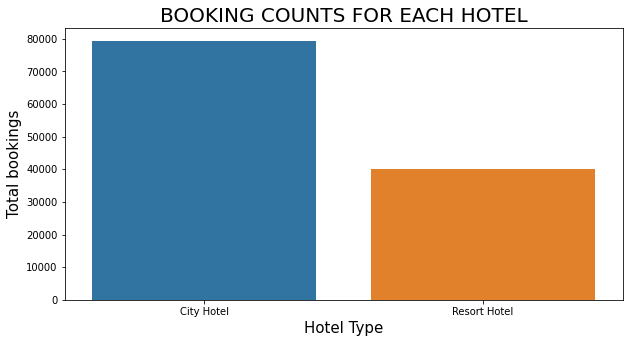

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=hotel_type, y=hotel_booked).set_title('BOOKING COUNTS FOR EACH HOTEL', fontsize=20)
plt.xlabel('Hotel Type', fontsize=15)
plt.ylabel('Total bookings', fontsize=15)


In [9]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Total count')

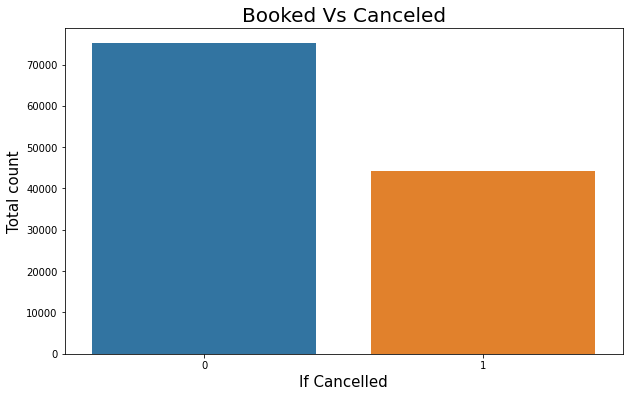

In [10]:
# is_canceled Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='is_canceled').set_title('Booked Vs Canceled', fontsize= '20')
plt.xlabel('If Cancelled', fontsize='15')
plt.ylabel('Total count', fontsize='15')

In [11]:
df.groupby(['is_canceled']).sum()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,,,,
0,6012129,151545744,2035506,1190594,69827,185213,137534,7693.0,780,3258,1187,15257,22051,5911971.0,1068051.0,119504,7515674.93,7464,53673
1,6405794,89163187,1207744,695558,40919,113298,84102,4710.0,169,552,9214,1111,4349,3021782.0,218395.0,157618,4641942.67,0,14542


In [12]:
df.groupby(['is_canceled'])['required_car_parking_spaces'].sum().reset_index()
# This Data Shows that cancellation of those hotels was done where parking spaces were zero.
# All the hotels which were cancelled, none of them had any parking spaces, as we can see the sum of the parking spaces equals to Zero.
# Where as those hotels where bookings were not cancelled had parking spaces which summed up to '7464'

,is_canceled,required_car_parking_spaces
0,0,7464
1,1,0


In [13]:
# Lead time description and distribution plot
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [14]:
# Check for outliers, as mean is 104
df[df['lead_time']>500].count()[0]
# We can see that there are more than 400 values above 500, so no outliers

481

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


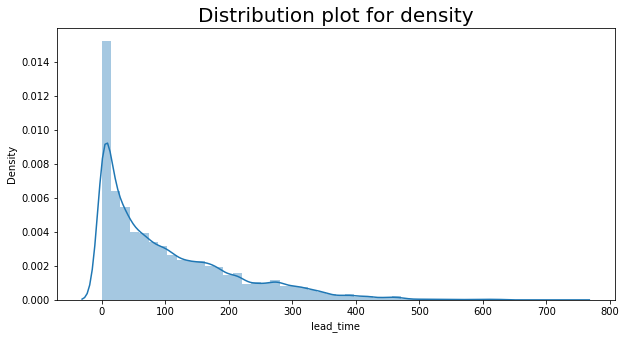

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df['lead_time']).set_title('Distribution plot for density', fontsize=20)
plt.show()
# Graph is positively skewed, and most of the values lies between 0-50, which restricted the mean value to 104.

In [16]:
df1=df[df['is_canceled']==1]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when booking canceled'})
df2=df[df['is_canceled']==0]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when not cancelled'})
pd.merge(df1,df2,how='outer', on='index')

# We can see that mean lead time for cancelled booking was 90% higher than not cancelled
# Which leads to the conclusion that people who booked hotels more than 4 months prior have more chances of getting cancelled than hotels booked within a month. 

,index,lead_time when booking canceled,lead_time when not cancelled
0,count,44224.000000,75166.000000
1,mean,144.848815,79.984687
2,std,118.624829,91.109888
3,min,0.000000,0.000000
4,25%,48.000000,9.000000
5,50%,113.000000,45.000000
6,75%,214.000000,124.000000
7,max,629.000000,737.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


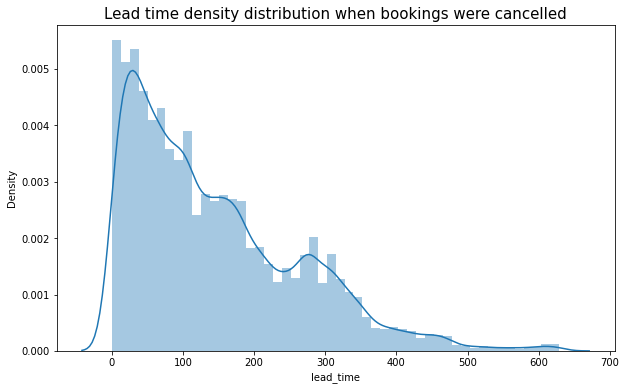

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['is_canceled']==1]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


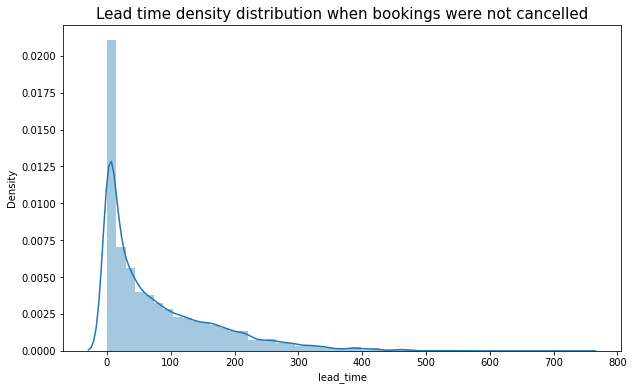

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['is_canceled']==0]['lead_time']).set_title('Lead time density distribution when bookings were not cancelled',fontsize=15)
plt.show()

# After analyzing both density distribution we can see that lead time of cancelled bookings was more scattered than bookings which were not cancelled.

Text(0, 0.5, 'No. of bookings')

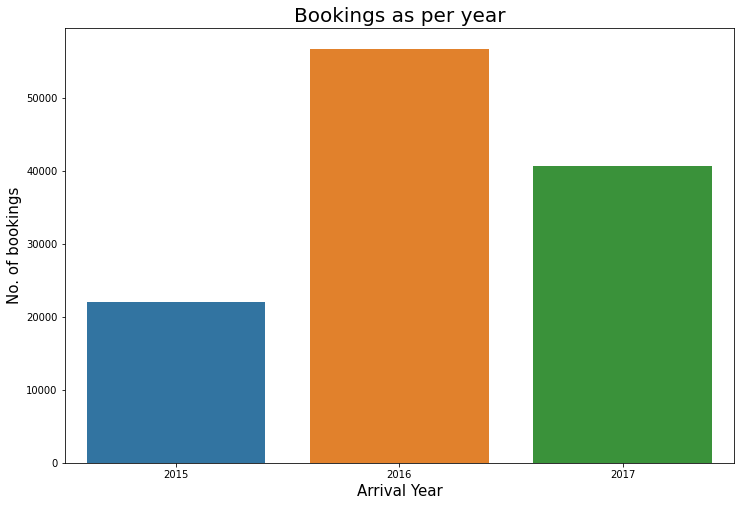

In [19]:
# Arrival date year bar plot
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='arrival_date_year').set_title('Bookings as per year', fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of bookings', fontsize=15)

Text(0.5, 1.0, 'Bookings as per month')

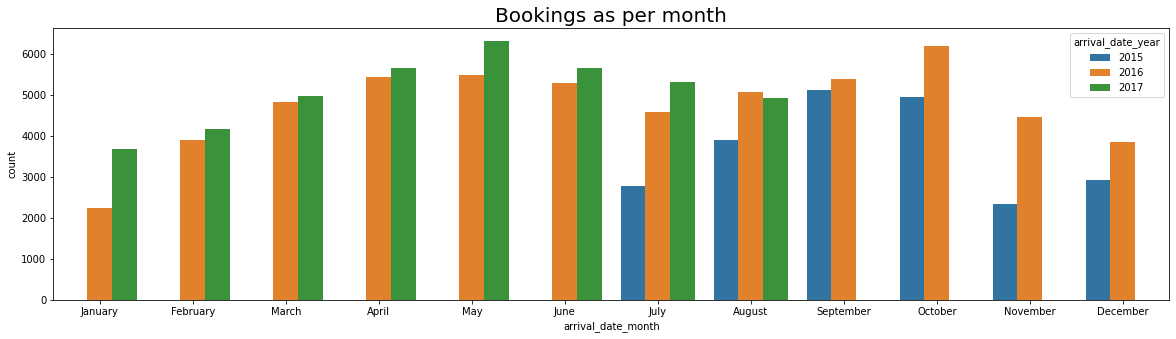

In [20]:
# Arrival date week bar plot
usual=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='arrival_date_month', hue='arrival_date_year', order=usual).set_title('Bookings as per month', fontsize=20)

Text(0.5, 1.0, 'Bookings as per week')

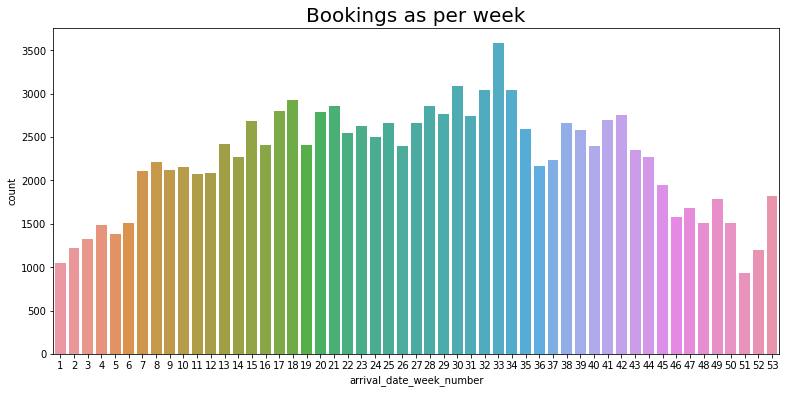

In [21]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='arrival_date_week_number').set_title('Bookings as per week', fontsize=20)

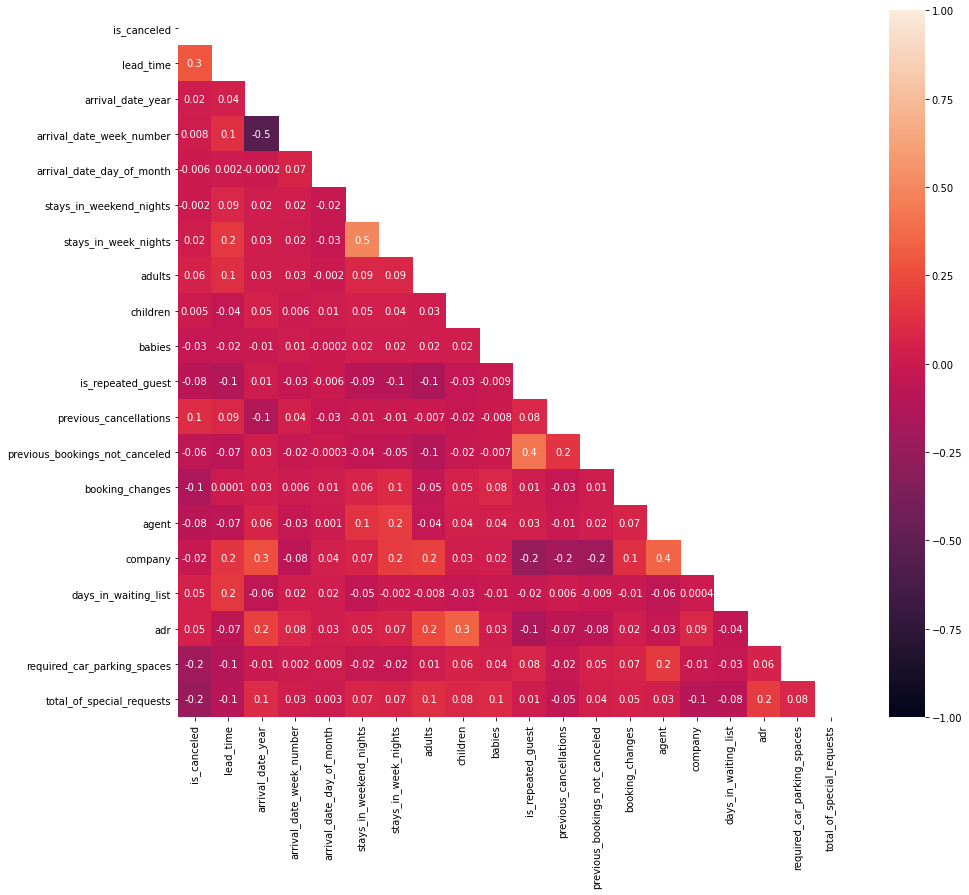

In [34]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, fmt='.1g', mask=np.triu(df.corr()))

In [35]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [36]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [46]:
wl=df['days_in_waiting_list'].value_counts().reset_index().sort_values(by='index').rename(columns={'index':'days_in_WL','days_in_waiting_list':'frequency'})
wl

,days_in_WL,frequency
0,0,115692
78,1,12
89,2,5
19,3,59
52,4,25
...,...,...
38,236,35
80,259,10
74,330,15
72,379,15


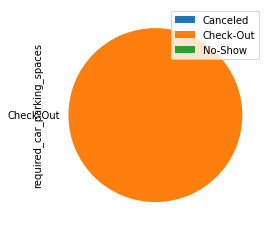

In [53]:
df.groupby(['']).sum().plot(kind='pie',y='required_car_parking_spaces')

In [22]:
# df['adr'].max()
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


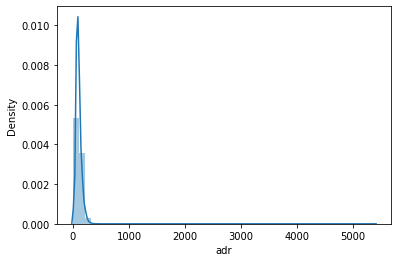

In [23]:
sns.distplot(df['adr'])
# plt.xticks([-10,0,100,200,300])


In [24]:
idx = df.loc[df['adr']==5400].index

In [25]:
df.iloc[idx]['adr'].replace(100, inplace = True)

In [26]:
df.iloc[idx]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [27]:
df.at[idx,'adr'] = 100

In [28]:
df['lead_time']

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64